<a href="https://colab.research.google.com/github/Jualopezm/Anal-tica-2022/blob/main/Copia_de_An%C3%A1lisis_de_Datos_Pokemones_Legendarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos del Proyecto de Ciencia de Datos: Análisis de Pokémon Legendario.

---------------
## Integrantes

+ Camilo Andrés López León - 20181167035
+ Jhon Alexander Montoya Rodrígez - 20182167095
+ Omar Rodrígez Aponte - 20182167051
+ Stefania Venegas Chaparro - 20181167053
---------------
## Contexto
---------------

Dentro del Mundo Pokémon, se considera legendario aquel Pokémon generalmente raro, con poderes sobrenaturales y que destacan sobre el resto. La mayoría de estos Pokémon forman parte del proceso de creación del Mundo y han intervenido de una u otra manera en él. Así mismo, suelen ser realmente difíciles de avistar y mucho más todavía de capturar; pues raramente se muestran ante los humanos.  

Hace un tiempo se recolectaron los datos de las estadisticas de los 802 pokemones conocidos en ese entonces.


-----------------
## Objectivo
-----------------

Analizar las habilidades con las que debe contar un Pokémon para que sea considerado legendario. 
Existen pokemones que se comparan a la fuerza de los pokemones legendarios pero ¿Por qué estos no son legendarios?.


## Importación de bibliotecas a usar.

In [ ]:
import numpy as np # Crea arreglos de grandes dimensiones y contiene funciones matemátematicas de alto nivel. 
import pandas as pd # Nos facilita la manipulación, tratamiento y análisis de los datos.
import seaborn as sns # Visualización de los datos.
import math
import matplotlib.pyplot as plt # Trazado para graficos en dos dimenciones.
from matplotlib.ticker import PercentFormatter # Da formato de porcentajes a los graficos.
import scipy.stats as stats # Distribuciones estadisticas y .stats se utiliza para analizar la distribución normal.
%matplotlib inline 

- **NumPy** es una librería esencial para el análisis de datos y el cálculo científico. Hace arreglos manipulables de grandes dimensiones y contiene un gran número de funciones matemátematicas de alto nivel.
Suele importarse con el alias np de la siguiente forma: `import numpy as np`. 

- **Pandas** es la librería más utilizada para el análisis, tratamiento (leer y escribir datos en diferentes formatos) y manipulación de datos, sus estructuras básicas son marcos de datos y series. Se basa en NumPy y generalmente se importa con el alias pd como `import pandas as pd`.

- **Seaborn** es una librería que funciona como una interfaz para Matplotlib y está integrada con pandas. Se utiliza para la visualización de datos con la creación de trazados estadiaticos. Se importa normalmente con el alias sns de la siguiente forma: `import seaborn as sns`. 

- **Matplotlib** es una librería para crear diagramas matemáticos, estadísticos y científicos. La colección matplotlib.pyplot emula la forma de hacer las cosas de Matlab. Se importa con el alias plt como `import matplotlib.pyplot as plt` y el comando `%matplotlib inline` muestra los gráficos dentro del cuaderno Jupyter.


In [ ]:
#Abrimos la base de datos que nos ha proporcionado el Profesor Oak.
Puchamon =  pd.read_csv("https://raw.githubusercontent.com/Calm-leon/proyecto-an-lisis-de-datos/main/Puchamon.csv")
Puchamon

,Unnamed: 0,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,0
798,798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


-------------------------
## Diccionaro del Conjunto de Datos según la Pokedex.
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del Pokémon en la enciclopedia *Pokedex*.
* name: Nombre de la especie del Pokémon según su evolución.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que mantiene el Pokémon al recibir un ataque.
* height_m: Altura de la especie del Pokémon según su evolución (m).
* hp: Puntos de vida.
* percentage_male: Porcentaje que regula la probabilidad de que al nacer el Pokémon sea de género masculino.
* sp_attack: Representa la velocidad con la que el Pokémon da un ataque. 
* sp_defense: Representa la velocidad con la que el Pokémon anula los puntos de vida del ataque enemigo.
* speed: Representa la velocidad con la que el Pokémon se desplaza en combate. 
* type: Tipo de Pokémon. 
* weight_kg: Peso del Pokémon (kg). 
* generation: Cada que hay una gran ola de nuevos Pokemones la "Pokedex" es actualizada. La generación indica en qué actualización se incorpora cada Pokémon.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

##¿Qué series no son imprecindibles para determinar si un Pokémon es legendario o no?.

La información proporcionada en las series de *percentage_male*,*type* y *generation* no nos suministran ningún dato relevante para indagar si un Pokémon es legendario o no, teniendo en cuenta que a los Pokemones no los hace legendarios su género ni su tipo. Adicionalmente los datos de la serie *generation* tan solo nos brindan una idea del año en el que fueron avistados por primera vez los Pokemones, lo cual es irrelevante. Por lo tanto, las series mencionadas previamente fueron eliminadas de la base de datos. 

In [ ]:
Puchamon=Puchamon.drop(['percentage_male','type','generation','Unnamed: 0'],axis=1)
Puchamon

,pokedex_number,name,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1,Bulbasaur,49,49,0.7,45,65,65,45,6.9,0
1,2,Ivysaur,62,63,1.0,60,80,80,60,13.0,0
2,3,Venusaur,100,123,2.0,80,122,120,80,100.0,0
3,4,Charmander,52,43,0.6,39,60,50,65,8.5,0
4,5,Charmeleon,64,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,181,131,0.3,59,59,31,109,0.1,0
798,799,Guzzlord,101,53,5.5,223,97,53,43,888.0,1
799,800,Necrozma,107,101,2.4,97,127,89,79,230.0,1
800,801,Magearna,95,115,1.0,80,130,115,65,80.5,1


-----------------
## Limpieza del Conjunto de Datos.
-----------------


In [ ]:
Puchamon3=Puchamon.drop(['attack','defense','height_m','hp','sp_attack','sp_defense','speed','weight_kg','is_legendary'],axis=1) 
Puchamon = pd.concat([Puchamon3,Puchamon.hp,Puchamon.attack,Puchamon.defense,Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense,Puchamon.is_legendary], axis=1)
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


In [ ]:
# Información del la base de datos Puchamon
Puchamon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  802 non-null    int64  
 1   name            802 non-null    object 
 2   hp              802 non-null    int64  
 3   attack          802 non-null    int64  
 4   defense         802 non-null    int64  
 5   height_m        802 non-null    float64
 6   weight_kg       802 non-null    float64
 7   speed           802 non-null    int64  
 8   sp_attack       802 non-null    int64  
 9   sp_defense      802 non-null    int64  
 10  is_legendary    802 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 69.0+ KB


In [ ]:
# Base final a trabajar
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


----------------------
# Análisis Descriptivo del Conjunto de Datos. 
----------------------
El análisis descriptivo es una etapa preliminar del tratamiento de datos que consiste en sintetizar los datos históricos para obtener información útil o incluso prepararlos para un análisis posterior. Este análisis se utiliza para buscar y resumir datos históricos con el fin de identificar patrones o significados.

In [ ]:
# Base de datos 
filtroLegendarios  =  Puchamon['is_legendary'] == 1
Legendarios = Puchamon[filtroLegendarios]
Legendarios

filtroNormales =  Puchamon['is_legendary'] == 0
Normales= Puchamon[filtroNormales]
Normales

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Kommo-o,75,110,125,1.6,78.2,85,100,105,0
793,794,Buzzwole,107,139,139,2.4,333.6,79,53,53,0
795,796,Xurkitree,83,89,71,3.8,100.0,83,173,71,0
796,797,Celesteela,97,101,103,9.2,999.9,61,107,101,0


-------------------------------
## Calculo de la varianza de Legendarios

En primer lugar, analizaremos las variables con el método `.describe` que nos arroja un objeto tipo dataframe donde las columnas son las variables del dataframe inicial y las filas corresponden al número total de los datos; la media; la desviación estándar; el mínimo dato; el primer, segundo y tercer cuartil y por último el máximo dato.

In [ ]:
T =Legendarios.iloc[:,1:10].describe() #me da gran parte de la lista count... max

ModaLegendarios=Legendarios.mode(axis=0,numeric_only= True)
MdLegendarios=ModaLegendarios.head(1)
MdLegendarios = MdLegendarios.drop(['pokedex_number','is_legendary'],axis=1)
MdLegendarios                           #La moda de los legendarios 
T= T.append(MdLegendarios,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)

var=Legendarios.var()              #varianza
var=pd.DataFrame(var, columns = ['Var'])
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var = var.transpose( )
T= T.append(var,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda',9:'var'},inplace= True)
T

<ipython-input-9-1443ca0635cd>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var=Legendarios.var()              #varianza


,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,97.403509,109.421053,99.719298,2.359649,211.807018,92.649123,115.701754,106.298246
std,31.870194,32.596531,28.559933,1.586197,235.911157,22.931179,34.891651,29.228756
min,43.000000,29.000000,31.000000,0.100000,0.100000,37.000000,29.000000,31.000000
25%,80.000000,90.000000,85.000000,1.500000,52.600000,85.000000,91.000000,90.000000
50%,91.000000,107.000000,100.000000,1.900000,187.000000,95.000000,120.000000,100.000000
75%,106.000000,130.000000,115.000000,3.200000,260.000000,108.000000,137.000000,120.000000
max,223.000000,180.000000,200.000000,7.000000,999.900000,151.000000,194.000000,200.000000
Moda,80.000000,100.000000,100.000000,2.000000,0.300000,90.000000,90.000000,100.000000
var,1015.709273,1062.533835,815.669799,2.516021,55654.073878,525.838972,1217.427318,854.320175


-------------------------------
## Calculo de la varianza de Normales

In [ ]:
T2 =Normales.iloc[:,1:10].describe() #me da gran parte de la lista count... max

ModaNormals = Normales.mode(axis=0,numeric_only= True)
MdNormals   = ModaNormals.head(1)
MdNormals   = MdNormals.drop(['pokedex_number','is_legendary'],axis=1)
MdNormals                          #La moda de los legendarios 
T2= T2.append(MdNormals,ignore_index= True)
T2.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)

var=Normales.var()              #varianza
var=pd.DataFrame(var, columns = ['Var'])  
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var = var.transpose( )
T2= T2.append(var,ignore_index= True)
T2.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda',9:'var'},inplace= True)
T2

<ipython-input-10-5516acedabbf>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var=Normales.var()              #varianza


,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,66.824161,75.472483,71.001342,1.061745,48.881879,64.366443,67.947651,68.242953
std,24.854360,30.833312,29.981513,0.961308,80.752140,28.347236,29.542091,25.948383
min,1.000000,5.000000,5.000000,0.100000,0.100000,5.000000,10.000000,20.000000
25%,50.000000,53.000000,50.000000,0.500000,8.500000,43.000000,45.000000,50.000000
50%,65.000000,71.000000,65.000000,0.900000,24.500000,60.000000,63.000000,65.000000
75%,79.000000,95.000000,86.000000,1.400000,55.800000,84.000000,85.000000,85.000000
max,255.000000,185.000000,230.000000,14.500000,999.900000,180.000000,175.000000,230.000000
Moda,60.000000,55.000000,50.000000,0.600000,15.000000,60.000000,40.000000,50.000000
var,617.739200,950.693126,898.891127,0.924113,6520.908152,803.565808,872.735159,673.318583


## Tipos de Análisis Descriptivo.
El análisis descriptivo indica las tendencias claves en los datos existentes y observa las situaciones que conducen a nuevos hechos. Esta clase de análisis puede clasificarse en 4 tipos. Son las medidas de frecuencia, de tendencia central, de dispersión o variación y de posición.
Para este caso particular, se iniciará con las medidas de tendencia central, las cuales son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores, es decir, nos dan una idea de cómo es el elemento típico (más central) en un conjunto de datos para una(s) variable(s) determinada(s). 


### Variable `hp`

##Medidas de tendencia central. 
A continuación se presentará los valores para la variable `hp` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de hp para los Pokemones Legendarios es $\bar{x}=$97,4 y para los No Legendarios es $\bar{x}=$66,8. En otras palabras, en promedio cada Pokémon Legendario puede alcanzar 97,4 puntos de vida en combate, mientras que un Pokémon No Legendario puede obtener apenas 66,8. 
- La mitad de los Pokemones Legendarios obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida. Para el caso de los Pokemones No Legendarios, la mitad de estos obtiene puntos de vida menores a $Q_2=$65 (**mediana**), y, la otra mitad tiene más de $Q_2=$65 puntos de vida. 
- Los puntos de vida que suelen obtener con mayor frecuencia (**moda**) los Pokemones Legendarios es de ${M_o}=$ 80, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 60.

-----------------------
# Diagramas de caja para la variable hp.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c1a0d35b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c1a0d3c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c1a0d3250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c1a0dc370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c1a0dc670>],
 'means': []}

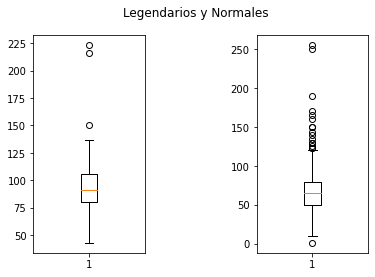

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['hp'])
ax2.boxplot(Normales['hp'])



-----------------------
# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que existen tres valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 106-80 =26$, por ende, el bigote inferior dado por $Q_1 - (1.5(IRQ))=$ 41 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 145.
Ahora, el cuartil inferior ($Q_1$= 80) indica que una cuarta parte de los Pokemones Legendarios alcanzan 80 puntos de vida en combate, la mitad de estos puede alcanzar menos de $Q_2$ = 91 puntos de vida, y, finalmente el cuartil superior ($Q_3=$ 106) indica que una tercera cuarta parte de los Pokemones Legendarios alcanzan 106 puntos de vida en combate.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que existen demasiados valores atípicos, los cuales se encuentran fuera del bigote inferior y superior. El rango intercuartílico es igual a 29, por ende, el bigote inferior está dado por 6.5 y el bigote superior dado por 122.5.
Ahora, el cuartil inferior ($Q_1$= 50) indica que una cuarta parte de los Pokemones No Legendarios alcanzan 50 puntos de vida en combate, la mitad de estos puede alcanzar menos de $Q_2$ = 65 puntos de vida, y, finalmente el cuartil superior ($Q_3=$ 79) indica que una tercera cuarta parte de los Pokemones No Legendarios alcanzan 79 puntos de vida en combate.





### Variable `attack`

##Medidas de tendencia central.  
A continuación se presentará los valores para la variable `attack` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.  Los puntos de vida que quita al dar un ataque.
- La **media** de attack para los Pokemones Legendarios es $\bar{x}=$109,4 y para los No Legendarios es $\bar{x}=$75,4. En otras palabras, en promedio cada Pokémon Legendario quita 109,4 puntos de vida al dar un ataque, mientras que un Pokémon No Legendario quita 75,4 puntos de vida al dar un ataque. 
- Los puntos de vida que quitan al dar un ataque la mitad de los Pokemones Legendarios es menor a $Q_2=$ 109,4(**mediana**), de la misma manera, los puntos de vida que quitan al dar un ataque la mitad de los Pokemones Legendarios es mayor a $Q_2=$ 109,4. Para el caso de los Pokemones No Legendarios, los puntos de vida que quitan al dar un ataque la mitad de estos es menor a $Q_2=$ 71 (**mediana**), y, los puntos de vida que quita la otra mitad al dar un ataque es mayor a $Q_2=$ 71.  
- Los puntos de vida que quitan con más frecuencia (**moda**) al dar un ataque los Pokemones Legendarios es de ${M_o}=$ 100, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 55.

-----------------------
# Diagramas de caja para la variable attack.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c17ac9100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c17ac97c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c17abed60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c17ac9e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c17ad31c0>],
 'means': []}

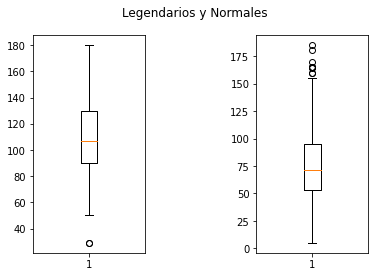

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['attack'])
ax2.boxplot(Normales['attack'])

# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que existe un valor atípico, el cual se encuentra fuera del bigote inferior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 130-90 =40$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 30 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 190.
Ahora, el cuartil inferior ($Q_1$= 90) indica que una cuarta parte de los Pokemones Legendarios quita 90 puntos de vida al dar un ataque, la mitad de estos puede alcanzar menos de $Q_2$ = 107 puntos de vida, y, finalmente el cuartil superior ($Q_3=$ 130) indica que una tercera cuarta parte de los Pokemones Legendarios quita 106 puntos de vida al dar un ataque.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que existen más de cinco valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico es igual a 42, por ende, el bigote inferior está dado por 10 y el bigote superior dado por 158.
Ahora, el cuartil inferior ($Q_1$= 53) indica que una cuarta parte de los Pokemones No Legendarios quita 53 puntos de vida al dar un ataque, la mitad de estos puede alcanzar menos de $Q_2$ = 71 puntos de vida al dar un ataque, y, finalmente el cuartil superior ($Q_3=$ 95) indica que una tercera cuarta parte de los Pokemones No Legendarios quitan 95 puntos de vida al dar un ataque.

### Variable `defense`


##Medidas de tendencia central.
A continuación se presentará los valores para la variable `defense` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de defense para los Pokemones Legendarios es $\bar{x}=$ 99.7 y para los No Legendarios es $\bar{x}=$71. En otras palabras, en promedio cada Pokémon Legendario mantiene unos puntos de vida de 99.7 al recibir un ataque, mientras que un Pokémon No Legendario mantiene unos puntos de vida de 71 al recibir un ataque. 
- La mitad de los Pokemones Legendarios mantienen los puntos de vida menores a $Q_2=$ 100(**mediana**) al recibir un ataque, de la misma manera, la otra mitad mantiene los puntos de vida mayores a $Q_2=$ 100 al recibir un ataque. Para el caso de los Pokemones No Legendarios, la mitad de estos mantiene los puntos de vida menores a $Q_2=$ 65(**mediana**) al recibir un ataque, y, la otra mitad mantiene los puntos de vida mayores a $Q_2=$ 65 al recibir un ataque.  
- Los puntos de vida que mantinen con más frecuencia (**moda**) los Pokemones Legendarios al recibir un ataque es de ${M_o}=$ 100, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 50.

-----------------------
# Diagramas de caja para la variable defense.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c17b434f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c17a7feb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c17a5bb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c17a7fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c179f10a0>],
 'means': []}

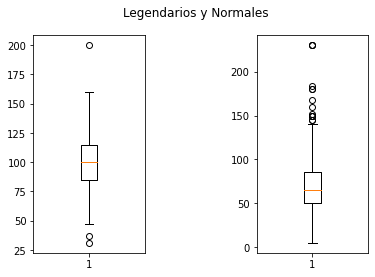

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['defense'])
ax2.boxplot(Normales['defense'])

# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que existen tres valores atípicos, los cuales se encuentran fuera del bigote inferior y superior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 115-85 =30$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 40 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 160.
Ahora, el cuartil inferior ($Q_1$= 85) indica que una cuarta parte de los Pokemones Legendarios mantiene 85 puntos de vida al recibir un ataque, la mitad de estos puede mantener menos de $Q_2$ = 100 puntos de vida al recibir un ataque, y, finalmente el cuartil superior ($Q_3=$ 115) indica que una tercera cuarta parte de los Pokemones Legendarios mantiene 115 puntos de vida al recibir un ataque.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que existen muchos valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico es igual a 36, por ende, el bigote inferior está dado por 4 y el bigote superior dado por 140.
Ahora, el cuartil inferior ($Q_1$= 50) indica que una cuarta parte de los Pokemones No Legendarios mantiene 50 puntos de vida al recibir un ataque, la mitad de estos puede mantener menos de $Q_2$ = 65 puntos de vida al recibir un ataque, y, finalmente el cuartil superior ($Q_3=$ 86) indica que una tercera cuarta parte de los Pokemones No Legendarios mantiene 86 puntos de vida al recibir un ataque.

### Variable `height_m`

##Medidas de tendencia central. 
A continuación se presentará los valores para la variable `height_m` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de height_m para los Pokemones Legendarios es $\bar{x}=$ 2,3 y para los No Legendarios es $\bar{x}=$ 1,06. En otras palabras, en promedio cada Pokémon Legendario tiene una altura de 2,3, mientras que un Pokémon No Legendario tiene tiene una altura de 1,06. 
- La mitad de los Pokemones Legendarios tiene una altura menor a $Q_2=$ 1,9 (**mediana**), de la misma manera, la otra mitad tiene una altura mayor a $Q_2=$ 1,9. Para el caso de los Pokemones No Legendarios, la mitad de estos tiene una altura menor a $Q_2=$ 0,9 (**mediana**), y, la otra mitad tiene una altura mayor a $Q_2=$ 0,9.  
- La altura más frecuente (**moda**) que tienen los Pokemones Legendarios es de ${M_o}=$ 2, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 0,6.

-----------------------
# Diagramas de caja para la variable height_m.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c17862610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c17862d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c178622b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c1786a400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c1786a700>],
 'means': []}

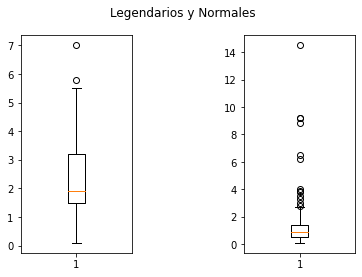

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['height_m'])
ax2.boxplot(Normales['height_m'])

# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que existen dos valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 3.2 - 1.5 = 1.7$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 1.05 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 5.75.
Ahora, el cuartil inferior ($Q_1$= 1.5) indica que una cuarta parte de los Pokemones Legendarios mide 1.5 metros, la mitad de estos mide menos de $Q_2$ = 1.9 metros, y, finalmente el cuartil superior ($Q_3=$ 3.2) indica que una tercera cuarta parte de los Pokemones Legendarios mide 3.2 metros.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que existen muchos valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico es igual a 0.9, por ende, el bigote inferior está dado por 0.85 y el bigote superior dado por 2.75.
Ahora, el cuartil inferior ($Q_1$= 0.5) indica que una cuarta parte de los Pokemones No Legendarios mide 0.5 metros, la mitad de estos mide menos de $Q_2$ = 0.9 metros, y, finalmente el cuartil superior ($Q_3=$ 1.4) indica que una tercera cuarta parte de los Pokemones No Legendarios mide 1.4 metros.

### Variable `weight_kg`

##Medidas de tendencia central. 
A continuación se presentará los valores para la variable `weight_kg` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de weight_kg para los Pokemones Legendarios es $\bar{x}=$ 211,8 y para los No Legendarios es $\bar{x}=$ 48,8. En otras palabras, en promedio cada Pokémon Legendario tiene un peso de 211,8, mientras que un Pokémon No Legendario tiene una altura de 48,8. 
- La mitad de los Pokemones Legendarios tiene un peso menor a $Q_2=$ 187 (**mediana**), de la misma manera, la otra mitad tiene un peso mayor a $Q_2=$ 187. Para el caso de los Pokemones No Legendarios, la mitad de estos tiene un peso menor a $Q_2=$ 24,5 (**mediana**), y, la otra mitad tiene un peso mayor a $Q_2=$ 24,5.  
- El peso más frecuente (**moda**) que tienen los Pokemones Legendarios es de ${M_o}=$ 0.3, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 15.

-----------------------
# Diagramas de caja para la variable weight_kg.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c1777bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c17838490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c1777ba60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c17838b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c17838e50>],
 'means': []}

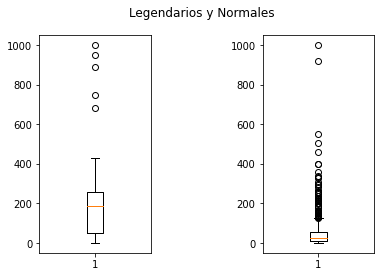

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['weight_kg'])
ax2.boxplot(Normales['weight_kg'])

# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que existen cinco valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 260 - 52.6 = 207.4$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 258.5 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 571.1.
Ahora, el cuartil inferior ($Q_1$= 52.6) indica que una cuarta parte de los Pokemones Legendarios pesa 52.6 kilogramos, la mitad de estos pesa menos de $Q_2$ = 187 kilogramos, y, finalmente el cuartil superior ($Q_3=$ 260) indica que una tercera cuarta parte de los Pokemones Legendarios pesa 260 kilogramos.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que existen muchos valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico es igual a 47.3, por ende, el bigote inferior está dado por 62.45 y el bigote superior dado por 126.75.
Ahora, el cuartil inferior ($Q_1$= 8.5) indica que una cuarta parte de los Pokemones No Legendarios pesa 8.5 kilogramos, la mitad de estos pesa menos de $Q_2$ = 24.5 kilogramos, y, finalmente el cuartil superior ($Q_3=$ 1.4) indica que una tercera cuarta parte de los Pokemones No Legendarios pesa 55.8 metros.

### Variable `speed`

##Medidas de tendencia central. 
A continuación se presentará los valores para la variable `speed` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de speed para los Pokemones Legendarios es $\bar{x}=$ 92,64 y para los No Legendarios es $\bar{x}=$ 64,36. En otras palabras, en promedio cada Pokémon Legendario tiene una velocidad de 92.64 con la se desplaza en combate, mientras que un Pokémon No Legendario tiene una velocidad de 64,36. 
- La mitad de los Pokemones Legendarios tiene una velocidad menor a $Q_2=$ 95 (**mediana**) con la se desplaza en combate, de la misma manera, la otra mitad tiene una velocidad mayor a $Q_2=$ 95 con la se desplaza en combate. Para el caso de los Pokemones No Legendarios, la mitad de estos tiene una velocidad menor a $Q_2=$ 60 (**mediana**) con la que se desplaza en combate, y, la otra mitad tiene una velocidad mayor a $Q_2=$ 60.  
- La velocidad más frecuente (**moda**) con la que se desplazan los Pokemones Legendarios en combate es de ${M_o}=$ 90, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 60.

-----------------------
# Diagramas de caja para la variable speed.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c17691280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c17691940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c17687ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c1761d040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c1761d340>],
 'means': []}

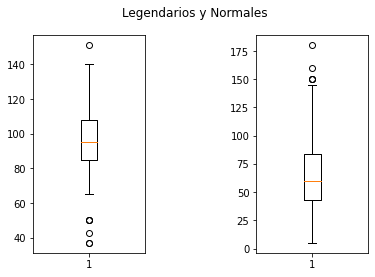

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['speed'])
ax2.boxplot(Normales['speed'])

# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que existen cuatro valores atípicos, los cuales se encuentran fuera del bigote superior e inferior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 108 - 85 = 23$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 50.5 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 142.5.
Ahora, el cuartil inferior ($Q_1$= 85) indica que una cuarta parte de los Pokemones Legendarios se desplaza con una velocidad en combate de 52.6, la mitad de estos se desplaza con una velocidad en combate de menor de $Q_2$ = 95, y, finalmente el cuartil superior ($Q_3=$ 108) indica que una tercera cuarta parte de los Pokemones Legendarios se desplaza con una velocidad en combate de 260.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que existen mas de tres valores atípicos, los cuales se encuentran fuera del bigote superior. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a 41, por ende, el bigote inferior está dado por 18.5 y el bigote superior está dado por 145.5.
Ahora, el cuartil inferior ($Q_1$= 43) indica que una cuarta parte de los Pokemones No Legendarios se desplaza con una velocidad en combate de 43, la mitad de estos se desplaza con una velocidad en combate de menor de $Q_2$ = 60, y, finalmente el cuartil superior ($Q_3=$ 84) indica que una tercera cuarta parte de los Pokemones Legendarios se desplaza con una velocidad en combate de 84.

### Variable `sp_attack`

##Medidas de tendencia central.
A continuación se presentará los valores para la variable `sp_attack` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de sp_attack para los Pokemones Legendarios es $\bar{x}=$115,7 y para los No Legendarios es $\bar{x}=$67,9. En otras palabras, en promedio cada Pokémon Legendario tiene una velocidad de 109,4 para propiciar un ataque en combate sin importar su tamaño ni peso, mientras que un Pokémon No Legendario tiene una velocidad de 75,4 para propiciar un ataque en combate. 
- La mitad de los Pokemones Legendarios tiene una velocidad menor a $Q_2=$ 120(**mediana**) para propiciar un ataque en combate sin importar su tamaño ni peso, de la misma manera, la otra mitad tiene una velocidad mayor a $Q_2=$ 120 para propiciar un ataque en combate. Para el caso de los Pokemones No Legendarios, la mitad de estos tiene una velocidad menor a $Q_2=$ 63(**mediana**) para propiciar un ataque en combate sin importar su tamaño ni peso, y, la otra mitad tiene una velocidad mayor a $Q_2=$ 63 para propiciar un ataque en combate.  
- La velocidad más frecuente (**moda**) que tienen los Pokemones Legendarios para propiciar un ataque en combate sin importar su tamaño ni peso es de ${M_o}=$ 90, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 40. 

-----------------------
# Diagramas de caja para la variable sp_attack.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c1752d280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c1752d940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c17525ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c1753c040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c1753c310>],
 'means': []}

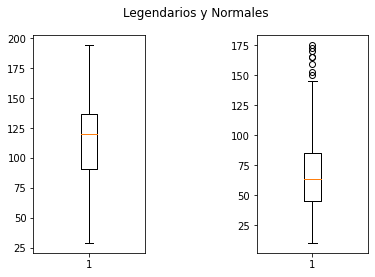

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['sp_attack'])
ax2.boxplot(Normales['sp_attack'])

# Análisis gráfico (caja de bigotes).
El gráfico izquierdo representa una distribución de los datos en relación a los Pokemones Legendarios, es evidente que no existen valores atípicos. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 137 - 91 = 46$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 22 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 206.
Ahora, el cuartil inferior ($Q_1$= 91) indica que una cuarta parte de los Pokemones Legendarios tiene una velocidad para propiciar un ataque de de 91, la mitad de estos se tiene una velocidad para propiciar un ataque menor a $Q_2$ = 120, y, finalmente el cuartil superior ($Q_3=$ 137) indica que una tercera cuarta parte de los Pokemones Legendarios tiene una velocidad para propiciar un ataque de 137.

Ahora, el gráfico derecho representa una distribución de los datos en relación a los Pokemones No Legendarios, es evidente que no existen valores atípicos. El rango intercuartílico (o longitud de la "caja", denotado por IQR) es igual a $Q_3 - Q_1= 137 - 91 = 46$, por ende, el bigote inferior está dado por $Q_1 - (1.5(IRQ))=$ 22 y el bigote superior dado por $Q_3 + (1.5(IRQ))=$ 206.
Ahora, el cuartil inferior ($Q_1$= 91) indica que una cuarta parte de los Pokemones Legendarios tiene una velocidad para propiciar un ataque de de 91, la mitad de estos se tiene una velocidad para propiciar un ataque menor a $Q_2$ = 120, y, finalmente el cuartil superior ($Q_3=$ 137) indica que una tercera cuarta parte de los Pokemones Legendarios tiene una velocidad para propiciar un ataque de 137.

### Variable `sp_defense`

##Medidas de tendencia central. 
A continuación se presentará los valores para la variable `defense` de los Pokemones Legendarios y No Legendarios de las medidas de tendencia central más utilizadas.
- La **media** de defense para los Pokemones Legendarios es $\bar{x}=$ 106.2 y para los No Legendarios es $\bar{x}=$68,2. En otras palabras, en promedio cada Pokémon Legendario tiene una velocidad de 106,2 para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso, mientras que un Pokémon No Legendario tiene una velocidad de 68,2 para anular los puntos de vida del ataque enemigo. 
- La mitad de los Pokemones Legendarios tiene una velocidad menor a $Q_2=$ 100(**mediana**) para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso, de la misma manera, la otra mitad tiene una velocidad mayor a $Q_2=$ 100 para propiciar un ataque en combate. Para el caso de los Pokemones No Legendarios, la mitad de estos tiene una velocidad menor a $Q_2=$ 65(**mediana**) para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso, y, la otra mitad tiene una velocidad mayor a $Q_2=$ 65 para anular los puntos de vida del ataque enemigo.  
- La velocidad más frecuente (**moda**) que tienen los Pokemones Legendarios para para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso es de ${M_o}=$ 100, y para el caso de los Pokemones No Legendarios es de ${M_o}=$ 50.

-----------------------
# Diagramas de caja para la variable sp_defense.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5c17431e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5c1743d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5c17431af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5c1743dc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5c1743dee0>],
 'means': []}

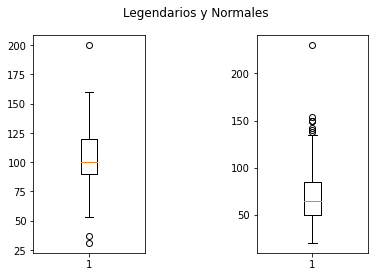

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['sp_defense'])
ax2.boxplot(Normales['sp_defense'])

# Matriz de correlación de la base Pokemones

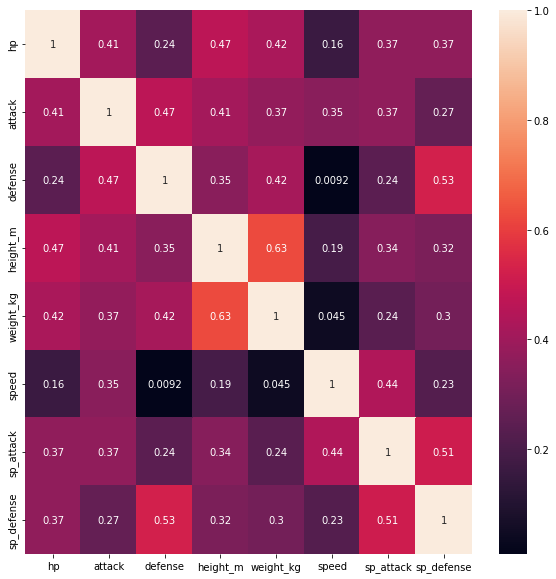

In [ ]:
# Creación de la Matiz
corr_matrix = Puchamon.iloc[:,1:10].corr()
corr_matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)
# Visualización de la matriz
plt.show()

---------------
## Conclusión:
Del mapa de calor anterior podemos decir que:

+ Existe una correlación positiva bastante fuerte entre las siguientes variables: weight_kg y height_m, sp_defense y defense. Sin embargo, esas correlaciones son bastante naturales y no brindan demasiada información para el estudio en sí. Puesto que, entre más alto sea un pokemon más pesado es, al igual que entre más defensa tiene un pokemon más tendrá velocidad para esquivar los ataques.

+ Una correlación mas iterezante es entre las variables sp_defense y sp_attack, lo que nos hace suponer que entre más es la velocidad de ataque de un pokemon más será la velocidad de esquivar los ataques.

+ Hay otras asociaciones positivas un poco débiles, pero que vale la pena análizar, son hp con las variables height_m, weight_kg, lo que podemos suponer que entre mas pesado y alto es un pokemon más vida tendrá.

+ Las variables con poca correlación speed con respecto a weight_kg, defense, nos sugieren que si un pokemon es muy veloz será liviao y con poca defensa.

__________________________________
#Regresion logistica, Analisis predictivo


In [ ]:
Puchamon=Puchamon.drop(['pokedex_number','name'],axis=1)  #me quiero quedar solo con los datos numericos
[n,m]=Puchamon.shape #me dice el tamaño que me quedo
Puchamon.columns =[1,2,3,4,5,6,7,8,9] #nombro las columnas como numeros para usar un for
Puchamon

,1,2,3,4,5,6,7,8,9
0,45,49,49,0.7,6.9,45,65,65,0
1,60,62,63,1.0,13.0,60,80,80,0
2,80,100,123,2.0,100.0,80,122,120,0
3,39,52,43,0.6,8.5,65,60,50,0
4,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...
797,59,181,131,0.3,0.1,109,59,31,0
798,223,101,53,5.5,888.0,43,97,53,1
799,97,107,101,2.4,230.0,79,127,89,1
800,80,95,115,1.0,80.5,65,130,115,1


In [ ]:
#Me hace la primer ecuacion normal de Gauus
A = []
for t in range(m+1):
     if t == 0:
        X = [n]
        A = A+X
     else: 
        X = [Puchamon[t].sum()]
        A = A+X
A = pd.DataFrame(A)       

In [ ]:
#me hace el resto de ecuaciones normales de Gauus para un sistema de ecuaciones
for t in range(1,m+1):
  NN=Puchamon
  B = [Puchamon[t].sum()]
  Puchamon2 = []
  Puchamon2 = pd.DataFrame(Puchamon2)

  for i in range(1,m):
      Puchamon2[i] = Puchamon[i]*NN[t]
      X = [Puchamon2[i].sum()]
      B = B + X 
  B = pd.DataFrame(B)
  A = pd.concat([A,B], axis=1)
A    #A es la matriz aumentada del sistema de ecuaciones lineales (La novena ecuacion es solo porque el ciclo tiene que acabar en uno mas)

,0,0,0,0,0,0,0,0,0,0
0,802.0,55336.0,62464.0,58580.0,925.50,48490.00,53234.0,57216.0,56900.0,57.0
1,55336.0,4384036.0,4591294.0,4201269.0,74549.90,4321291.30,3772860.0,4200392.0,4144870.0,5552.0
2,62464.0,4591294.0,5692868.0,4934310.0,83437.90,4821128.90,4409198.0,4763359.0,4623420.0,6237.0
3,58580.0,4201269.0,4934310.0,5036944.0,76900.80,4656368.10,3894892.0,4372602.0,4518926.0,5684.0
4,925.5,74549.9,83437.9,76900.8,1985.65,114173.41,66206.1,75563.1,73318.4,134.5
5,48490.0,4321291.3,4821128.9,4656368.1,114173.41,12305461.32,3331373.9,4132738.4,4167872.7,12073.0
6,53234.0,3772860.0,4409198.0,3894892.0,66206.10,3331373.90,4203144.0,4127220.0,3923831.0,5281.0
7,57216.0,4200392.0,4763359.0,4372602.0,75563.10,4132738.40,4127220.0,4920122.0,4430106.0,6595.0
8,56900.0,4144870.0,4623420.0,4518926.0,73318.40,4167872.70,3923831.0,4430106.0,4662392.0,6059.0
9,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
A=A.drop([9],axis=0)              #La novena ecuacion que tenemos no es necesaria la quitamos
A.columns =[1,2,3,4,5,6,7,8,9,'B'] #nombramos columnas
A1=A
A = A.drop(['B'],axis=1)          #quitamos la columna de soluciones 
B = A1.drop([1,2,3,4,5,6,7,8,9],axis=1) #y separamos la columna de soluciones

Betas = np.linalg.solve(A,B) #nos soluciona el sistema de ecuaciones
Betas = pd.DataFrame(Betas) #el dataframe de las soluciones
print(Betas)

          0
0 -0.259130
1  0.000443
2  0.000086
3 -0.000041
4 -0.005453
5  0.000694
6  0.001107
7  0.001379
8  0.001245


In [ ]:
b0= Betas.iloc[0] #nombro a cada una de las soluciones para hacer la funcion
b1= Betas.iloc[1]
b2= Betas.iloc[2]
b3= Betas.iloc[3]
b4= Betas.iloc[4]
b5= Betas.iloc[5]
b6= Betas.iloc[6]
b7= Betas.iloc[7]
b8= Betas.iloc[8]
def WhoisthatPokemon(x1,x2,x3,x4,x5,x6,x7,x8):
  y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8 #esta es la regresion lineal
  p = 1/(1+ math.exp(-y)) #esta la transformacion de regresion lineal a regresion logistica
  return p

In [ ]:
WhoisthatPokemon(80,	95,	115,	1.0,	80.5,	65,	130,	115) #Prueba de la funcion

0.5559397182887382

---------------------------
#Analisis del resultado de las predicciones

In [ ]:
#Recordar que T tiene los datos estadisticos de los pokeones legendarios, usar el valor medio osea el mean segunda fila
mean=T.iloc[1]

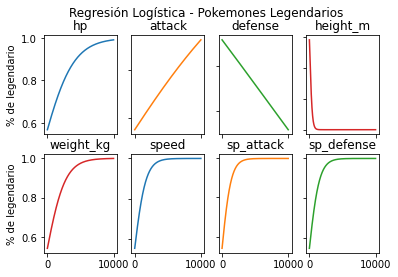

In [ ]:
L = 10000              #si van a hacer pruebas bajen esto pa que no se demore el final dejenlo alto pa que se vea el cambio
x = np.linspace(0,L,L+1)
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
for i in range(0,L+1):
  y = [WhoisthatPokemon(i,mean[1],mean[2],mean[3],mean[4],mean[5],mean[6],mean[7])]
  y0 = y0+y

  y = [WhoisthatPokemon(mean[0],i,mean[2],mean[3],mean[4],mean[5],mean[6],mean[7])]
  y1 = y1+y

  y = [WhoisthatPokemon(mean[0],mean[1],i,mean[3],mean[4],mean[5],mean[6],mean[7])]
  y2 = y2+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],i,mean[4],mean[5],mean[6],mean[7])]
  y3 = y3+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],i,mean[5],mean[6],mean[7])]
  y4 = y4+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],mean[4],i,mean[6],mean[7])]
  y5 = y5+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],mean[4],mean[5],i,mean[7])]
  y6 = y6+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],mean[4],mean[5],mean[6],i)]
  y7 = y7+y

fig, axs = plt.subplots(2, 4)
fig.subplots_adjust(hspace=0.2, wspace=0.2) #aca se mueve la distancia entre graficas
axs[0, 0].plot(x, y0)
axs[0, 0].set_title('hp')
axs[0, 1].plot(x, y1, 'tab:orange')
axs[0, 1].set_title('attack')
axs[0, 2].plot(x, y2, 'tab:green')
axs[0, 2].set_title('defense')
axs[0, 3].plot(x, y3, 'tab:red')
axs[0, 3].set_title('height_m')
axs[1, 0].plot(x, y4, 'tab:red')
axs[1, 0].set_title('weight_kg')
axs[1, 1].plot(x, y5, 'tab:blue')
axs[1, 1].set_title('speed')
axs[1, 2].plot(x, y6, 'tab:orange')
axs[1, 2].set_title('sp_attack')
axs[1, 3].plot(x, y7, 'tab:green')
axs[1, 3].set_title('sp_defense')
fig.suptitle('Regresión Logística - Pokemones Legendarios')
for ax in axs.flat:
    ax.set( ylabel='% de legendario')

for ax in axs.flat:
    ax.label_outer()





---------------------
## Conclusión:
+  Analizando las caracteristicas y habilidades de un Pokemon como la vida, el ataque, su velocidad, etc. Podemos decir que aunque haya Pokemones no legendarios que en algunos aspectos superan a los legendarios hay variables que tienen mas peso que otras a la hora de determinar que el Pokeon sea o no legendario. Y con este plateamiento abrimos la puerta a nuestra pergunta inical ¿Por qué estos no son legendarios? y una respuesta para esto es: Aunque los superen el algunas variables estas no tendran la misma importancia que otras a la hora de considerarlo como legendario, por ejemplo la variable de altura (height_m) donde vemos que practicamente todos los Pokemones legendarios no son muy altos y aun así son legendarios.